In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import re

df = pd.read_csv("merged_clean(last_version).csv", sep=";", encoding="utf-8", engine="python")

df["metascore"] = pd.to_numeric(df["metascore"], errors="coerce")
df["user_score"] = pd.to_numeric(df["user_score"], errors="coerce")

###Гипотеза 2. Инди-игры получают более высокие пользовательские оценки, но более низкие оценки критиков



Определение инди-игр



In [4]:
df["is_indie"] = df["genres_api"].str.contains("Indie", case=False, na=False)

In [5]:
indie_df = df[df["genres_api"].astype(str).str.contains("Indie", case=False, na=False)]

Приводим user_score к шкале 0–100, чтобы сравнить с metascore

In [6]:
result = df.groupby("is_indie")[["metascore", "user_score"]].mean()
print("Средние оценки:")
print(result)

Средние оценки:
          metascore  user_score
is_indie                       
False     70.206259    6.920878
True      73.277072    6.971455


In [7]:
indie_df = df[df["genres_api"].astype(str).str.contains("Indie", case=False, na=False)]


In [8]:
avg_metascore_indie = indie_df["metascore"].mean()
avg_userscore_indie = indie_df["user_score"].mean() * 10

In [9]:
indie_scores = pd.DataFrame({
    "Оценка": [avg_metascore_indie, avg_userscore_indie]
}, index=["Оценка критиков (Metascore)", "Оценка пользователей (User Score)"])

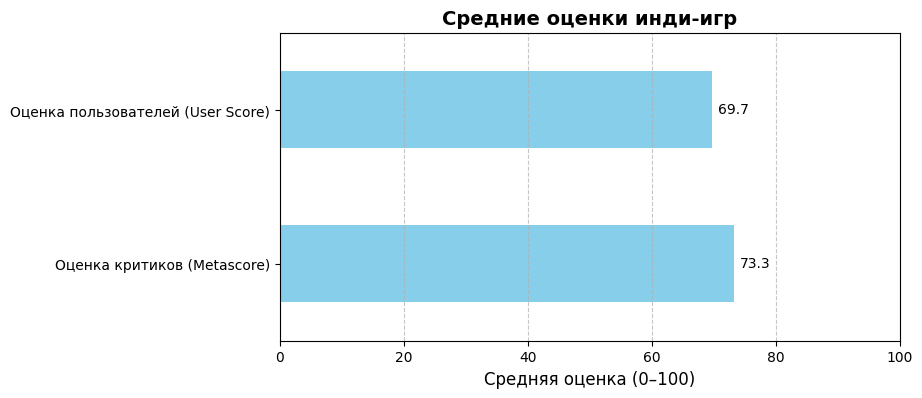

In [10]:
ax = indie_scores.plot(kind="barh", color=["skyblue", "salmon"], legend=False, figsize=(8, 4))

plt.title("Средние оценки инди-игр", fontsize=14, fontweight="bold")
plt.xlabel("Средняя оценка (0–100)", fontsize=12)
plt.xlim(0, 100)
plt.grid(axis="x", linestyle="--", alpha=0.7)
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height() / 2, f"{width:.1f}", va="center", fontsize=10)
plt.show()


Напротив, у Indie игр средняя оценка критиков даже немного выше. Гипотеза о низких критических оценках инди-игр тоже не подтверждается.

Предполагалось, что инди-игры будут получать более низкие оценки критиков и более высокие пользовательские оценки.
Фактически обе группы оценок оказались почти одинаковыми — Metascore ≈73.4, User Score ≈6.9.

Это может говорить о том, что:

* Инди-игры перестали быть “любительским” продуктом. Критики оценивают их наравне с крупными релизами, признавая высокий уровень исполнения и идей.

* Пользователи и критики сходятся во мнении, что у инди-проектов есть сильные стороны — атмосфера, новаторство, честность подачи.

* Пропасть между вкусами аудитории и профессиональной оценкой сокращается: жанр инди стал зрелым, а ожидания — реалистичными.

В итоге, разница между восприятием критиков и игроков минимальна — инди-игры получили статус полноценного и уважаемого сегмента индустрии, а не нишевого эксперимента для энтузиастов.

###Гипотеза 5. Игры, вышедшие сразу на нескольких платформах, получают выше средний рейтинг, чем эксклюзивы.

Считаем количество платформ

In [11]:
df['platform_count'] = df['platforms_api'].str.split(',').str.len()
df['is_exclusive'] = df['platform_count'] == 1

Определяем мультиплтфоменная ли игра или эксклюзив (выпущена для одной платформы)

In [12]:
result = df.groupby('is_exclusive')[['metascore', 'user_score']].mean()
result.index = result.index.map({True: 'Эксклюзив', False: 'Мультиплатформа'})
result = result.loc[['Эксклюзив', 'Мультиплатформа']]
print("Средние оценки:")
print(result.round(2))

Средние оценки:
                 metascore  user_score
is_exclusive                          
Эксклюзив            73.08        7.09
Мультиплатформа      70.42        6.92


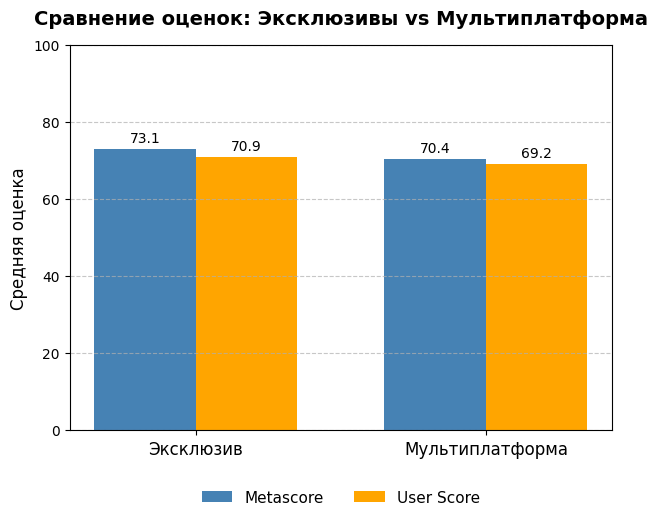

In [15]:
categories = result.index.tolist()
metascores = result['metascore'].to_numpy()
userscores = (result['user_score'] * 10).to_numpy()
x = np.arange(len(categories))
width = 0.35

plt.figure(figsize=(7, 5))
bars1 = plt.bar(x - width/2, metascores, width, label='Metascore', color='steelblue')
bars2 = plt.bar(x + width/2, userscores, width, label='User Score', color='orange')

plt.title('Сравнение оценок: Эксклюзивы vs Мультиплатформа', fontsize=14, fontweight='bold', pad=15)
plt.ylabel('Средняя оценка', fontsize=12)
plt.xticks(x, categories, fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2, frameon=False, fontsize=11)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 1,
                 f'{height:.1f}', ha='center', va='bottom', fontsize=10)

plt.show()

Гипотеза не подтверждается.
Наоборот - эксклюзивы в среднем получают более высокие оценки и от критиков, и от игроков.

Это может быть связано с тем, что:

Эксклюзивы часто разрабатываются под конкретную архитектуру, что позволяет лучше оптимизировать игру.
Крупные студии (Sony Santa Monica, Naughty Dog, Nintendo EPD) выпускают качественные эксклюзивы как флагманы платформ.

Для мультиполатформенных игр правда, что разработчики вынуждены создавать игру, которая одинаково хорошо (или, скорее, не хуже минимально допустимого) запускается на всех целевых устройствах. Это приводит к тому, что они ориентируются на самую низкую общую производительность среди всех платформ. В результате, более мощные консоли (например, PlayStation 5 или Xbox Series X) не могут реализовать свой полный потенциал, потому что их версии игры ограничены техническими возможностями самой слабой платформы.